
# Project: Investigate a Dataset (No-show appointments Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

This dataset is collected 
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment .
We are trying to determine the factors that are
important for us to know in order to predict if a patient will
show up for their scheduled appointment Throught out this questions :
- which gender commits to their appointments ?
- What's the range of ages of people who come to their appointments ?
- Is getting a reminder message affects the number of people coming ?
- What days are the most likely that people come in ?
- People with which diseases comes the most ? 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Data Gathering 

In [50]:
appointments_df = pd.read_csv('noshowappointments-may-2016.csv')
appointments_df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [51]:
appointments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [52]:
appointments_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [53]:
appointments_df.duplicated().sum()

0

### Accessing data
#### Data quality issues :

>consistency issues :
>- AppointmentDay is not a datetime object .
>- ScheduledDay is not a datetime object .
>- No-show coloumn can do miss understanding and it's not boolean .
>- SMS_received is not boolean .
>- Scholarship is not boolean .
>- PatientId is not integer .

>Validity issue :
>- Some has age 0 and -1 .
#### Tidness isuess :
>- (Hipertension , Diabetes , Alcoholism , Handcap) these Column headers are values, not variable names , columns should be united under a classification column .

### Data Cleaning
### Define
- change AppointmentDay type to a datetime object .
- change ScheduledDay type to a datetime object .
- change No-show coloumn to showed and change it's type to boolean .
- change SMS_received type to boolean .
- change Scholarship type to  boolean .
- change PatientId type to int .
- combine (Hipertension , Diabetes , Alcoholism , Handcap) under diseases column .
- Remove rows with age 0 and -1

In [54]:
# making copies of the data before cleaning
appointments_df_clean = appointments_df.copy()

### Code and Test

In [55]:
# Change AppointmentDay type to a datetime object 
appointments_df_clean['AppointmentDay'] = pd.to_datetime(appointments_df_clean['AppointmentDay'] )
# Test
appointments_df_clean.AppointmentDay.dtype

datetime64[ns, UTC]

In [56]:
# Change ScheduledDay type to a datetime object 
appointments_df_clean['ScheduledDay'] = pd.to_datetime(appointments_df_clean['ScheduledDay'] )
# Test
appointments_df_clean.ScheduledDay.dtype

datetime64[ns, UTC]

In [57]:
# Rename No-show coloumn to showed
appointments_df_clean.rename (columns ={'No-show':'Showed'} ,inplace =True)
# change it's type to boolean 
appointments_df_clean.loc[appointments_df_clean.Showed == 'No' ,'Showed'] = True
appointments_df_clean.loc[appointments_df_clean.Showed == 'Yes','Showed' ] = False
appointments_df_clean.Showed = appointments_df_clean.Showed.astype('bool')
# Test
appointments_df_clean.info()
appointments_df_clean.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  Showed        

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,5.590000e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,4.260000e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,8.680000e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,8.840000e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,True
5,9.600000e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,True
6,7.340000e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,False
7,3.450000e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,False
8,5.640000e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,True
9,7.810000e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,True


In [58]:
# change SMS_received type to boolean 
appointments_df_clean.SMS_received = appointments_df_clean.SMS_received.astype('bool')
# Test 
appointments_df_clean.SMS_received.dtype

dtype('bool')

In [59]:
#change Scholarship type to boolean 
appointments_df_clean.Scholarship = appointments_df_clean.Scholarship.astype('bool')
# Test 
appointments_df_clean.Scholarship.dtype

dtype('bool')

In [60]:
# change PatientId type to int 
appointments_df_clean.PatientId = appointments_df_clean.PatientId.astype(np.int64)
# Test
appointments_df_clean.PatientId.dtype

dtype('int64')

In [61]:
# combine (Hipertension , Diabetes , Alcoholism , Handcap) under diseases column
# Change the Type of these columns to string
appointments_df_clean.Hipertension = appointments_df_clean.Hipertension.astype('str')
appointments_df_clean.Diabetes = appointments_df_clean.Diabetes.astype('str')
appointments_df_clean.Alcoholism = appointments_df_clean.Alcoholism.astype('str')
appointments_df_clean.Handcap = appointments_df_clean.Handcap.astype('str')

# Replace every '1' with the disease name
appointments_df_clean.Hipertension.replace('1','-Hipertension' , inplace= True)
appointments_df_clean.Diabetes.replace('1','-Diabetes', inplace= True)
appointments_df_clean.Alcoholism.replace('1','-Alcoholism', inplace= True) 
appointments_df_clean.Handcap.replace('1','-Handcap', inplace= True)
appointments_df_clean.Handcap.replace('2','-Handcap', inplace= True)
appointments_df_clean.Handcap.replace('3','-Handcap', inplace= True)
appointments_df_clean.Handcap.replace('4','-Handcap', inplace= True)

# Replace every '0' with empty space
appointments_df_clean.Hipertension.replace('0','' , inplace= True)
appointments_df_clean.Diabetes.replace('0','', inplace= True)
appointments_df_clean.Alcoholism.replace('0','', inplace= True) 
appointments_df_clean.Handcap.replace('0','', inplace= True)
# adding these coumns into 1 column (Diseases)
appointments_df_clean['Diseases'] = appointments_df_clean['Hipertension'].str.strip() + appointments_df_clean['Diabetes'].str.strip() + appointments_df_clean['Alcoholism'].str.strip() + appointments_df_clean['Handcap'].str.strip()

# Replacing empty spaces in Diseases with 'No Diseases' 
appointments_df_clean.Diseases.loc[appointments_df_clean.Diseases == ''] = 'No Diseases'

# Dropping the extra columns 
appointments_df_clean.drop(['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'],axis =1 , inplace =True)

# Test
appointments_df_clean.head(5)


C:\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,Showed,Diseases
0,29900000000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,False,True,-Hipertension
1,559000000000000,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,True,No Diseases
2,4260000000000,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,True,No Diseases
3,868000000000,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,True,No Diseases
4,8840000000000,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,True,-Hipertension-Diabetes


In [62]:
# Remove rows with age 0 and -1
appointments_df_clean.drop(appointments_df_clean.loc[appointments_df_clean['Age'] == 0 ].index.values , axis =0 , inplace = True)
appointments_df_clean.drop(appointments_df_clean.loc[appointments_df_clean['Age'] == -1 ].index.values , axis =0 , inplace = True)
# Test
appointments_df_clean.Age.value_counts()

1      2273
52     1746
49     1652
53     1651
56     1635
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

## Storing

In [63]:
appointments_df_clean.to_csv('New_noshowappointments.csv' , index = False)

<a id='eda'></a>
## Exploration

In [64]:
appointments_df_clean.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'SMS_received',
       'Showed', 'Diseases'],
      dtype='object')

>So what is interesting to me the most about this data is the main question we are trying to answer, " How can we know if the patient will commit to their appointment ? "
I find it very interesting to know the factors that affect the patiant's decision about showing to the appointment as knowing these factors would help us make a good business decision to fix the problem

So in order to do that , I am gonna start with some exploration for our dataset like knowing which gender had the most appointments ?

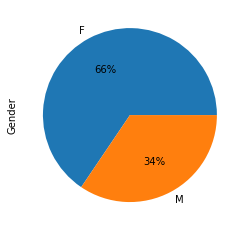

In [65]:
# Gender chart 
appointments_df_clean.Gender.value_counts().plot(kind = 'pie',autopct="%0.f%%");

### Looks like most of our data set is females

what about the ages ? do we have a small or a large range of ages ?

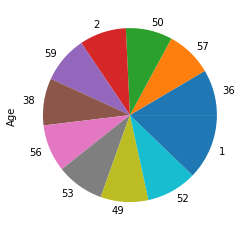

In [66]:
# age chart , most 10 ages that had appontments in the data set 
appointments_df_clean.Age.value_counts().sort_values(ascending=False)[10::-1].plot(kind ='pie');

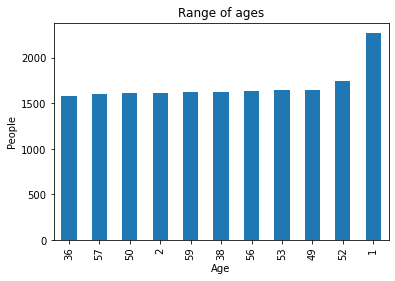

In [67]:
appointments_df_clean.Age.value_counts().sort_values(ascending=False)[10::-1].plot(kind ='bar');

plt.title("Range of ages")
plt.xlabel("Age")
plt.ylabel("People");

### Seems like we have a very large range , almost every age

what about diseases ? do our patiants have specific diseases ?

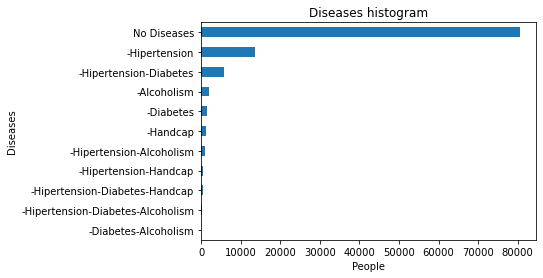

In [68]:
# Diseases histogram
appointments_df_clean.Diseases.value_counts().sort_values(ascending=False)[10::-1].plot(kind ='barh');

plt.title("Diseases histogram")
plt.xlabel("People")
plt.ylabel("Diseases");

### Looks like most of our data set has no diseases

## Let's move on to our important questions about patiants who came
## Research Question 1 (which gender commits to their appointments ?) 

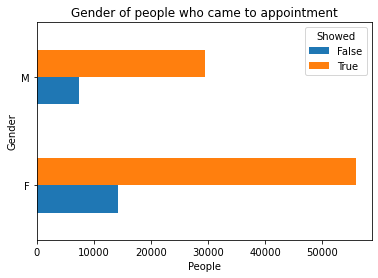

In [69]:
# plot the gender column with respect to showed column
appointments_df_clean.groupby(['Gender']).Showed.value_counts().unstack(1).plot(kind='barh');

plt.title("Gender of people who came to appointment")
plt.xlabel("People")
plt.ylabel("Gender");

I don't think this graph fully reresent the relation as the number of total females is not the same as males. 
It should be represented with a ratio between Males who came with respect to total number of males to Females who came whith respect to total number of females

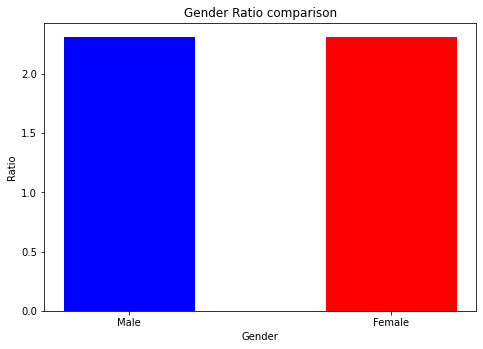

In [70]:
# Find Ration of men that had an appointment and came
Male_True = appointments_df_clean[appointments_df_clean['Gender']=='M' ]
Male_True = appointments_df_clean[appointments_df_clean['Showed'] == True ]
Male_count = len(appointments_df_clean[appointments_df_clean['Gender']=='M' ].index)

Male_Ratio =(len(Male_True.index)/Male_count)

# Find Ration of women that had an appointment and came

Female_True = appointments_df_clean[appointments_df_clean['Gender']=='F' ]
Female_True = appointments_df_clean[appointments_df_clean['Showed'] == True ]
Female_count = len(appointments_df_clean[appointments_df_clean['Gender']=='F' ].index)

Female_Ratio =(len(Female_True.index)/Female_count)
# plot the ratio between them
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

Gender = ['Male' , 'Female']
Ratios = [Male_Ratio , Female_Ratio]
ax.bar(Gender[0] ,Ratios, color = 'b', width = 0.5)
ax.bar(Gender[1] ,Ratios, color = 'r', width = 0.5)
plt.title("Gender Ratio comparison")
plt.xlabel("Gender")
plt.ylabel("Ratio");
plt.show()

### Looks like No gender has the preference  in coming to appointments

## Research Question 2  (What's the range of ages of people who come to their appointments ?)

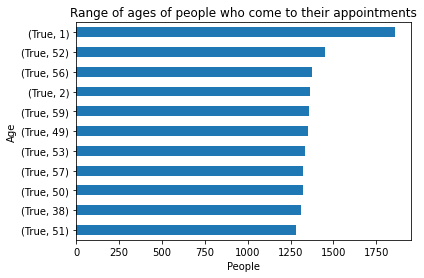

In [71]:
# Select people who came
df = appointments_df_clean[appointments_df_clean['Showed']== True ]
# plot with respect to age
df.groupby(['Showed']).Age.value_counts().sort_values(ascending=False)[10::-1].plot(kind='barh');

plt.title("Range of ages of people who come to their appointments")
plt.xlabel("People")
plt.ylabel("Age");

unfortunatly we don't know if the people with zero age is a data entering error or they are patiants who's age is between 0 and 1  , If that's what it means then they are the majority of patiants who came to their appontments .

## Research Question 3  (Is getting a reminder message affects the number of people coming ?)

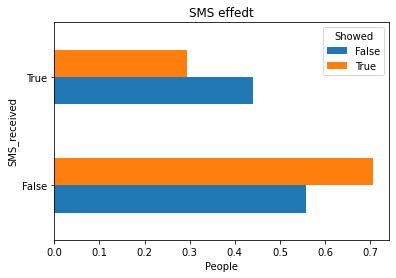

In [72]:
# plot with respect to SMS_received
appointments_df_clean.groupby(['SMS_received']).Showed.value_counts().unstack(1).apply(lambda x: x/x.sum()).plot(kind='barh');

plt.title("SMS effedt")
plt.xlabel("People")
plt.ylabel("SMS_received");

### Looks like it doesn't have a big effect as many people recieved a message and didn't come

## Research Question 4  (What days are the most likely that people come in ?)

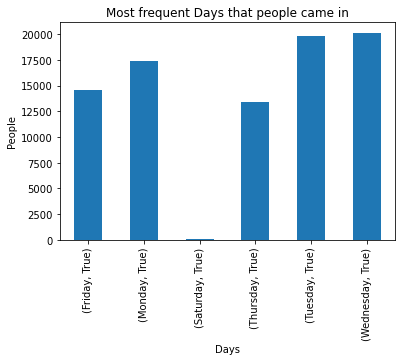

In [73]:
# Add a column that represent Day of week of appointment
weekDays = ("Saturday","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday")
appointments_df_clean['Day'] = appointments_df_clean.AppointmentDay.dt.day_name()
# Select people who came
df = appointments_df_clean[appointments_df_clean['Showed']== True ]
# plot with respect to Day
df.groupby(['Day']).Showed.value_counts().plot(kind='bar');

plt.title("Most frequent Days that people came in")
plt.xlabel("Days")
plt.ylabel("People");

### Looks like people came most on wednesday and least on saturday

## Research Question 5 (People with which diseases comes the most ?)

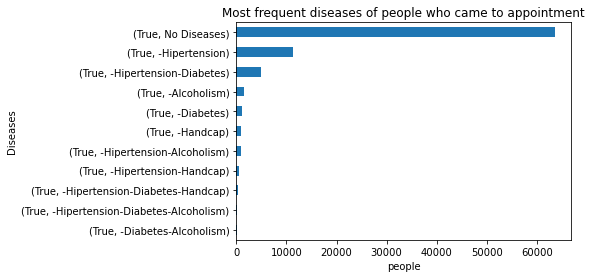

In [74]:
# Select people who came
df = appointments_df_clean[appointments_df_clean['Showed']== True ]
# plot with respect to Diseases
df.groupby(['Showed']).Diseases.value_counts().sort_values(ascending=False)[10::-1].plot(kind='barh');

plt.title("Most frequent diseases of people who came to appointment")
plt.xlabel("people")
plt.ylabel("Diseases");

### Looks like most people who came to their appointment has no diseases

<a id='conclusions'></a>
# Conclusions

Limitations of the dataset :
This analysis was done considering the data collected from medical centers in Brazil during a few months only .

This data is not completely error free as we are not sure if the data provided to us is completely correct and up-to-date.
There was some data thats not coorect as people with age 0 and -1  , I had to drop these rows to clean the data .
Dropping these rows affected the overall analysis. 
 
Based on terms and conditions of using this free-to-public data, I’m not completely sure that a good business-decision could  rely only on these findings , It needs more research and more data to have a reliable answer the specified question .